1. The "first pre-lecture video" (above) describes hypothesis testing as addressing "an idea that can be tested", and the end of the video then discusses what our actual intended purpose in setting up a null hypothesis is. What is the key factor that makes the difference between ideas that can, and cannot be examined and tested statistically? What would you describe is the key "criteria" defining what a good null hypothesis is? And what is the difference between a null hypothesis and an alternative hypothesis in the context of hypothesis testing? Answer these questions with concise explanations in your own words.

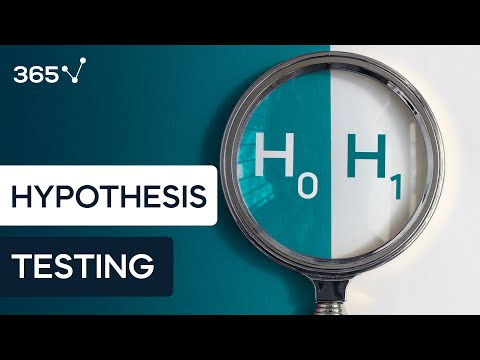

In [1]:
from IPython.display import YouTubeVideo
# First pre-lecture video: 
# "Hypothesis testing. Null vs alternative
# https://www.youtube.com/watch?v=ZzeXCKd5a18
YouTubeVideo('ZzeXCKd5a18', width=800, height=500)

   The key factor that distinguishes ideas that can and cannot be examined and tested statistically is whether or not there is data to test. The video provides the example of the better candidate in the "Hillary versus Trump" U.S. presidential election campaign which is an idea that could not be tested because at the time of the election neither had been U.S. presidents before. This is different from the "Obama versus Bush" question because both had eight years worth of performance as presidents that could be used as data. 
   The key "criteria" defining a good null hypothesis is one that is specific, testable, and reflects the assumption of no effect or no difference between groups or variables. It must be framed in a way that can be empirically tested and falsified if evidence suggests otherwise, and it typically involves a statement about population parameters, not sample statistics. In hypothesis testing, the null hypothesis assumes there is no effect or relationship, while the alternative hypothesis suggests that there is an effect or difference. The goal of the test is to determine whether there is enough evidence to reject the null hypothesis in favor of the alternative. If the null hypothesis is rejected, it implies support for the alternative; otherwise, we maintain the null.

2. Towards the end of the "first pre-lecture" video (above) it is stated that, "It is important to note that outcomes of tests refer to the population parameter, rather than the sample statistic! As such, the result that we get is for the population." In terms of the distinctions between the concepts of xi's, x̄, μ and μ0, how would you describe what the sentence above means? Explain this concisely in your own words for a "non-statsitical" audience, defining the technical statistical terminology you use in your answer.

   The sentence means that when we run a statistical test, we are making conclusions about the entire population, not just the specific data we've collected. In technical terms, each xi represents an individual data point (like a single person’s height), and x̄ is the average of those data points in our sample (sample mean). However, what we really care about is μ, the true average (mean) for the entire population, which we can't measure directly. The test helps us decide whether μ is equal to some hypothesized value μ0 (like saying "the average height of adults is 5'8"). The outcome of the test is about μ, the population mean, not just our sample.

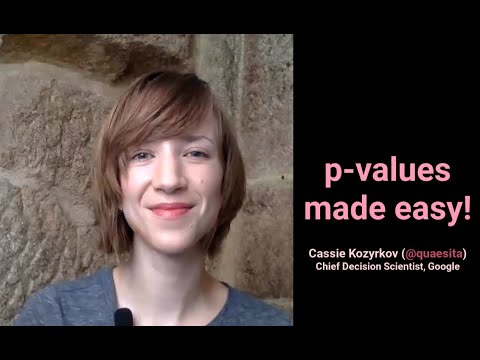

In [2]:
from IPython.display import YouTubeVideo
# Second pre-lecture video
# "What is a p-value"
# https://www.youtube.com/watch?v=9jW9G8MO4PQ
YouTubeVideo('9jW9G8MO4PQ', width=800, height=500)

3. The second "Pre-lecture" video (above) explains that we "imagine a world where the null hypothesis is true" when calculating a p-value? Explain why this is in your own words in a way that makes the most sense to you.

We “imagine a world” where the null is true because it provides us with the baseline to compare the observed data against. The p-value measures how likely the observed data (or more extreme data) would be if the null hypothesis were actually correct. In hypothesis testing, the null hypothesis assumes there is no effect and when we calculate a p-value, we're asking: "If this assumption of no effect is true, what are the chances of seeing the data we observed, or something more extreme?" 

4. The second "Pre-lecture" video (above) describes suggest that a smaller p-value makes the null hypothesis look more ridiculous. Explain why this is in your own words in a way that makes the most sense to you, clarifying the meaning of any technical statistical terminology you use in your answer.

The p-value measures the probability of obtaining data as extreme, or more extreme, than what was observed, assuming the null hypothesis holds. So, when the p-value is very small, it suggests that the data we’ve collected is rare in a world where the null hypothesis is true. In other words, a small p-value means that the assumption of the null hypothesis doesn't fit well with the actual data. The smaller the p-value, the more evidence there is against the null hypothesis, making it seem more "ridiculous," as less of a reasonable explanation for the data. Thus, a small p-value suggests that the evidence against the null hypothesis is strong and we can reject it.

5. Güntürkün (2003) recorded how kissing couples tilt their heads. 80 out of 124 couples, or 64.5% tilted their heads to the right. Simulate a p-value using a "50/50 coin-flipping" model for the assumption of the null hypothesis H0 that the population of humans don't have left or right head tilt tendencies when kissing, and use the table below to determine the level of evidence we have against H0.

In [1]:
import numpy as np

# Constants
observed_right_tilts = 80
total_couples = 124
n_simulations = 100000  # Number of simulations

# Null hypothesis: 50% chance for left or right
null_distribution = np.random.binomial(total_couples, 0.5, n_simulations)

# Calculate p-value
p_value = np.mean(null_distribution >= observed_right_tilts)

# Output the results
print(f"Simulated p-value: {p_value:.4f}")

Simulated p-value: 0.0006


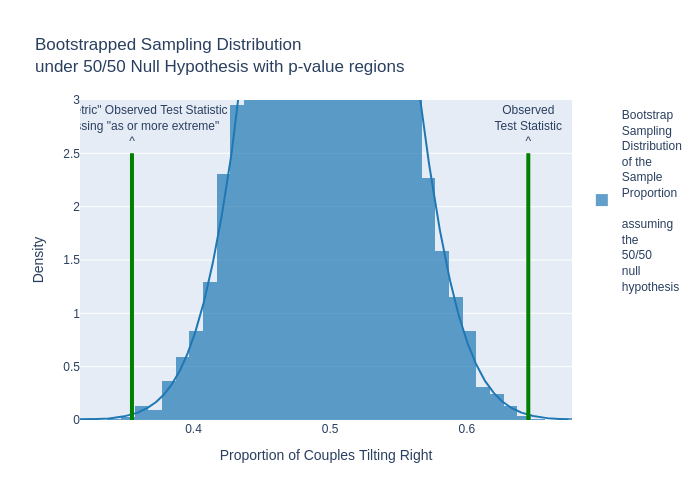

In [1]:
import numpy as np
import plotly.figure_factory as ff
import plotly.graph_objects as go

# Information provided
observed_test_statistic = 0.645  # 64.5% of couples tilted their heads to the right
n_couples = 124  # Total number of couples
population_parameter_value_under_H0 = 0.5  # Null hypothesis: 50/50 probability (coin flip)

# Simulating under the null hypothesis using a binomial distribution
simulated_proportions_under_H0 = np.random.binomial(n=n_couples, p=population_parameter_value_under_H0, size=10000) / n_couples

# Bootstrap sampling distribution (with a bit of noise for visualization purposes)
hist_data = [simulated_proportions_under_H0 + np.random.uniform(-0.01, 0.01, size=len(simulated_proportions_under_H0))]
group_labels = ['Bootstrap<br>Sampling<br>Distribution<br>of the<br>Sample<br>Proportion<br><br>assuming<br>the<br>50/50<br>null<br>hypothesis']

# Create the distribution plot
fig = ff.create_distplot(hist_data, group_labels, curve_type='normal',
                         show_hist=True, show_rug=False, bin_size=0.01)

pv_y = 2.5
pv_y_ = 0.25

# Add observed test statistic line
fig.add_shape(type="line", x0=observed_test_statistic, y0=0, 
              x1=observed_test_statistic, y1=pv_y,
              line=dict(color="Green", width=4), name="Observed Test Statistic")

fig.add_trace(go.Scatter(x=[observed_test_statistic], y=[pv_y+pv_y_], 
                         text=["Observed<br>Test Statistic<br>^"], mode="text", showlegend=False))

# Add symmetric test statistic line for "as or more extreme"
symmetric_test_statistic = population_parameter_value_under_H0 - \
                           abs(observed_test_statistic - population_parameter_value_under_H0)

fig.add_shape(type="line", x0=symmetric_test_statistic, y0=0, 
              x1=symmetric_test_statistic, y1=pv_y,
              line=dict(color="Green", width=4), name="Symmetric Test Statistic")

fig.add_trace(go.Scatter(x=[symmetric_test_statistic], y=[pv_y+pv_y_], 
                         text=['"Symmetric" Observed Test Statistic<br>addressing "as or more extreme"<br>^'], 
                         mode="text", showlegend=False))

# Add a transparent rectangle for the lower extreme region (updated bounds)
fig.add_shape(type="rect", x0=35.5/100, y0=0, x1=symmetric_test_statistic, y1=pv_y,
              fillcolor="LightCoral", opacity=0.5, line_width=0)

# Add a transparent rectangle for the upper extreme region (updated bounds)
fig.add_shape(type="rect", x0=observed_test_statistic, y0=0, x1=64.5/100, y1=pv_y,
              fillcolor="LightCoral", opacity=0.5, line_width=0)

# Update layout
fig.update_layout(
    title="Bootstrapped Sampling Distribution<br>under 50/50 Null Hypothesis with p-value regions",
    xaxis_title="Proportion of Couples Tilting Right", 
    yaxis_title="Density", 
    yaxis=dict(range=[0, pv_y + 2 * pv_y_])
)

# Render the plot as an image (change renderer to 'png')
fig.show(renderer="png")


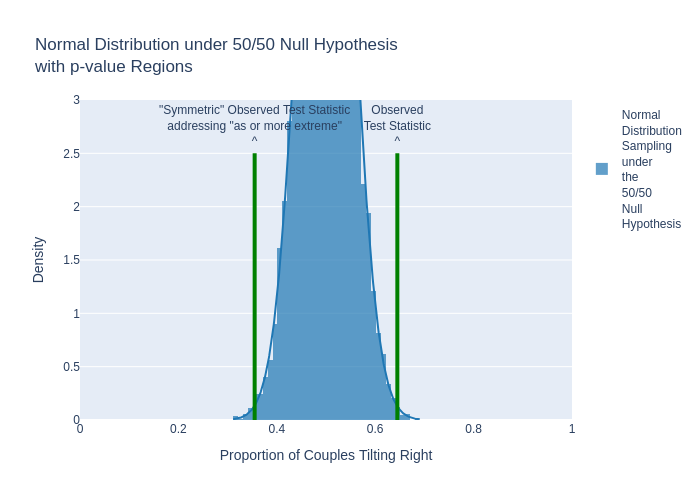

In [4]:
import numpy as np
import plotly.figure_factory as ff
import plotly.graph_objects as go
from scipy.stats import norm

# Information provided
observed_test_statistic = 0.645  # 64.5% of couples tilted their heads to the right
n_couples = 124  # Total number of couples
mean_under_H0 = 0.5  # Null hypothesis: mean of the normal distribution
std_under_H0 = 0.05  # Standard deviation for the normal distribution (adjust for fit)

# Simulating a normal distribution under H0, restricted to the range [0, 1]
simulated_proportions_under_H0 = np.clip(np.random.normal(loc=mean_under_H0, scale=std_under_H0, size=10000), 0, 1)

# Bootstrap sampling distribution (with a bit of noise for visualization purposes)
hist_data = [simulated_proportions_under_H0 + np.random.uniform(-0.01, 0.01, size=len(simulated_proportions_under_H0))]
group_labels = ['Normal<br>Distribution<br>Sampling<br>under<br>the<br>50/50<br>Null<br>Hypothesis']

# Create the distribution plot
fig = ff.create_distplot(hist_data, group_labels, curve_type='normal',
                         show_hist=True, show_rug=False, bin_size=0.01)

pv_y = 2.5
pv_y_ = 0.25

# Add observed test statistic line
fig.add_shape(type="line", x0=observed_test_statistic, y0=0, 
              x1=observed_test_statistic, y1=pv_y,
              line=dict(color="Green", width=4), name="Observed Test Statistic")

fig.add_trace(go.Scatter(x=[observed_test_statistic], y=[pv_y+pv_y_], 
                         text=["Observed<br>Test Statistic<br>^"], mode="text", showlegend=False))

# Add symmetric test statistic line for "as or more extreme"
symmetric_test_statistic = mean_under_H0 - abs(observed_test_statistic - mean_under_H0)

fig.add_shape(type="line", x0=symmetric_test_statistic, y0=0, 
              x1=symmetric_test_statistic, y1=pv_y,
              line=dict(color="Green", width=4), name="Symmetric Test Statistic")

fig.add_trace(go.Scatter(x=[symmetric_test_statistic], y=[pv_y+pv_y_], 
                         text=['"Symmetric" Observed Test Statistic<br>addressing "as or more extreme"<br>^'], 
                         mode="text", showlegend=False))

# Add a transparent rectangle for the lower extreme region (updated bounds)
fig.add_shape(type="rect", x0=35.5/100, y0=0, x1=symmetric_test_statistic, y1=pv_y,
              fillcolor="LightCoral", opacity=0.5, line_width=0)

# Add a transparent rectangle for the upper extreme region (updated bounds)
fig.add_shape(type="rect", x0=observed_test_statistic, y0=0, x1=64.5/100, y1=pv_y,
              fillcolor="LightCoral", opacity=0.5, line_width=0)

# Update layout
fig.update_layout(
    title="Normal Distribution under 50/50 Null Hypothesis<br>with p-value Regions",
    xaxis_title="Proportion of Couples Tilting Right", 
    yaxis_title="Density", 
    xaxis=dict(range=[0, 1]),  # Ensure x-axis stays between 0 and 1
    yaxis=dict(range=[0, pv_y + 2 * pv_y_])
)

# Render the plot as an image (change renderer to 'png')
fig.show(renderer="png")


In [2]:
import numpy as np

# Constants
observed_right_tilts = 80
total_couples = 124
n_simulations = 1000  # Number of simulations

# Null hypothesis: 50% chance for left or right tilt
null_distribution = np.random.binomial(total_couples, 0.5, n_simulations)

# Calculate how many simulations are "as or more extreme" than the observed test statistic
extreme_count = np.sum(null_distribution >= observed_right_tilts)

# Calculate p-value
p_value = extreme_count / n_simulations

# Output the results
print(f"Number of simulated test statistics (under H0) 'as or more extreme' than the observed: {extreme_count}")
print(f"p-value (simulations 'as or more extreme' / total simulations): {p_value:.4f}")

Number of simulated test statistics (under H0) 'as or more extreme' than the observed: 0
p-value (simulations 'as or more extreme' / total simulations): 0.0000


ChatBot Session: https://chatgpt.com/share/670c433f-bbf4-8009-b40e-475bd95c7b31

Summary: 

Initial Request: You wanted to simulate a p-value based on a "50/50 coin-flipping" model to test the null hypothesis that there is no preference for left or right head tilting when kissing. You provided the data that 80 out of 124 couples tilted their heads to the right.

Code Explanation: I provided Python code that simulates this scenario using a binomial distribution (np.random.binomial) to generate the number of right-tilting couples over 100,000 simulations. This code calculated how often we observe 80 or more right-tilting couples, which was then used to calculate the p-value.

Clarification on the Null Hypothesis: You asked about the range of probabilities (0 and 1) under the null hypothesis. I clarified that the null hypothesis assumes a 50% chance for left or right tilt (like a fair coin flip), and the simulation uses this assumption.

Enhancement: You requested that the code also report the number of simulated test statistics that are "as or more extreme" than the observed statistic, along with the p-value. I updated the code accordingly to include this feature.

6. Can a smaller p-value definitively prove that the null hypothesis is false? Is it possible to definitively prove that Fido (from the "second pre-lecture video") is innocent using a p-value? Is it possible to difinitively prove that Fido is guilty using a p-value? How low or high does a p-value have to be to definitely prove one or the other? Explain this concisely in your own words.

No, a p-value cannot definitively prove that the null hypothesis is false or that Fido is guilty or innocent. A low p-value suggests that the data provides strong evidence against the null hypothesis (such as innocence), but it does not offer absolute proof of guilt. Similarly, a high p-value indicates that the data is consistent with the null hypothesis, but it does not definitively prove innocence. P-values only measure the strength of evidence, not certainty, and hypothesis testing is based on probabilities, not absolute proof.

7. In the second half of the "first pre-lecture video" the concept of a "one sided" (or "one tailed") test is introduced in contrast to a "two sided" (or "two tailed") test. Work with a ChatBot to adjust the code from "Demo II of the Week 5 TUT" (which revisits the "Vaccine Data Analysis Assignment" from Week 04 HW "Question 8") in order to compute a p-value for a "one sided" (or "one tailed") hypothesis test rather than the "two sided" (or "two tailed") version it provides. Describe (perhaps with the help of your ChatBot) what changed in the code; how this changes the interpretation of the hypothesis test; and whether or not we should indeed expect the p-value to be smaller in the "one tailed" versus "two tailed" analysis.

In [13]:
import pandas as pd

patient_data = pd.DataFrame({
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F"],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
})
patient_data['HealthScoreChange'] = patient_data.FinalHealthScore-patient_data.InitialHealthScore

import numpy as np
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.figure_factory as ff

population_parameter_value_under_H0 = 0.5

observed_test_statistic = (patient_data.HealthScoreChange>0).mean()
simulated_test_statistics = IncreaseProportionSimulations_underH0random

SimTestStats_as_or_more_extreme_than_ObsTestStat = \
    abs(simulated_test_statistics - population_parameter_value_under_H0) >= \
    abs(observed_test_statistic - population_parameter_value_under_H0) 

np.random.seed(1)  # make simulation reproducible
number_of_simulations = 10000  # experiment with this... what does this do?
n_size = len(patient_data)  # 10
IncreaseProportionSimulations_underH0random = np.zeros(number_of_simulations)

In [14]:
# Calculate the observed test statistic
observed_test_statistic = (patient_data.HealthScoreChange > 0).mean()

# Simulated test statistics from the bootstrap under the null hypothesis
simulated_test_statistics = IncreaseProportionSimulations_underH0random

# For a right-tailed test, we only consider the extreme values that are greater than the observed test statistic
# This is the key difference for a one-sided test
SimTestStats_more_extreme_than_ObsTestStat = \
    simulated_test_statistics >= observed_test_statistic  # Right-tailed test

# Calculate the one-sided p-value
p_value = SimTestStats_more_extreme_than_ObsTestStat.sum() / number_of_simulations

# Print the results
print("Number of Simulations: ", number_of_simulations, "\n\n",
      "Number of simulated test statistics (under H0)\n",
      'that are "more extreme" than the observed test statistic: ',
      SimTestStats_more_extreme_than_ObsTestStat.sum(), "\n\n",
      'One-sided p-value\n(= simulations "more extreme" / total simulations): ', p_value, sep="")


Number of Simulations: 10000

Number of simulated test statistics (under H0)
that are "more extreme" than the observed test statistic: 0

One-sided p-value
(= simulations "more extreme" / total simulations): 0.0


Key Changes: The observed test statistic remains unchanged. It calculates the proportion of patients with a health score change greater than zero. Instead of calculating the absolute differences (which is useful for two-sided tests), you simply check whether each simulated test statistic is greater than or equal to the observed test statistic. This captures the extreme values for a right-tailed test. The calculation of the p-value is straightforward—count how many simulated statistics exceed the observed statistic and divide by the total number of simulations.

We should indeed expect the p-value to be smaller in the "one tailed" versus "two tailed" analysis. This is because the p-value from a one-tailed test corresponds to the entire area in one tail, while the p-value from a two-tailed test only captures half of that area (in the direction of the observed effect).

ChatBot Session: https://chatgpt.com/share/670c5b1f-e76c-8009-8897-d950df4cd4e2

Hypothesis Test Definitions:
Two-Tailed Test: Tests whether the mean is significantly different from a value (e.g., 0). Both tails of the distribution are considered.

One-Tailed Test: Tests whether the mean is significantly greater than (or less than) a specified value (e.g., 0.5). Only one tail is considered.

Code Modification:
We modified the code to compute a one-sided p-value by checking how many simulated test statistics were greater than the observed test statistic (0.8). The one-sided p-value was calculated as the proportion of simulations exceeding 0.8.

Expected Outcomes:
The one-sided p-value is generally expected to be smaller than the two-sided p-value if the observed statistic lies in the extreme of the distribution. This indicates stronger evidence against the null hypothesis in the direction of interest.

Interpretation:
The conversation highlighted how the choice between one-tailed and two-tailed tests affects hypothesis testing results and their interpretation.

8. Complete the following assignment.

Problem Introduction: 

The STA130 experiment closely parallels Ronald Fisher's original study because both involve testing whether individuals can discern the order in which milk and tea are poured. In both cases, participants were presented with cups prepared in two different ways and asked to identify the order without knowing how they were made. Each study uses a hypothesis testing framework to determine if the observed ability to identify the pouring order exceeds what would be expected by random guessing. While Fisher's study involved a smaller sample size of 8 cups, the STA130 experiment uses a larger group of 80 students, enhancing reliability. Not only are the sample sizes different, but so is the nature of the population. For an avid tea drinker like Bristol, the parameter of tea  in question might be considered more personalized in the original experiment; whereas, the parameter in the context of STA130 students might be a more abstract concept.

In the STA130 experiment, the null hypothesis states that the proportion of students who can correctly identify the order in which milk and tea were poured is equal to what would be expected by randomnly flipping a coin (p=0.5). This implies that any observed success rate in identifying the order is due to random guessing. Conversely, the alternative hypothesis posits that the proportion of correct identifications is greater than what would be expected by chance, indicating that students have a genuine ability to distinguish the order of pouring, or p>0.5.
    
    I define the significance level as a = 0.05. 

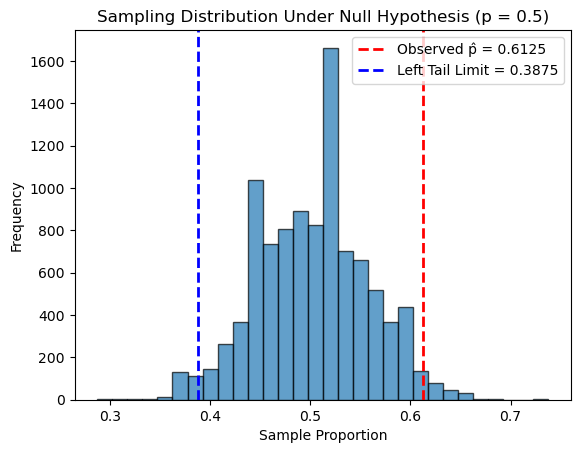

0.0465

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Given values
n = 80        # Sample size
x = 49        # Number of correct identifications
p_hat = x / n # Observed proportion
p_null = 0.5  # Null hypothesis proportion (random guessing)

# Number of simulations
n_simulations = 10000

# Simulate null hypothesis (random guessing, p = 0.5)
simulated_proportions = np.random.binomial(n, p_null, n_simulations) / n

# Calculate the two-sided p-value:
# Right side: p_sim >= p_hat (observed)
# Left side: p_sim <= 0.5 - (p_hat - 0.5) = 1 - p_hat
p_value_right = np.mean(simulated_proportions >= p_hat)
p_value_left = np.mean(simulated_proportions <= (p_null - (p_hat - p_null)))

# Total p-value (two-sided)
p_value_two_sided = p_value_right + p_value_left

# Visualize the simulation results
plt.hist(simulated_proportions, bins=30, edgecolor='black', alpha=0.7)
plt.axvline(p_hat, color='red', linestyle='dashed', linewidth=2, label=f'Observed p̂ = {p_hat}')
plt.axvline(0.5 - (p_hat - 0.5), color='blue', linestyle='dashed', linewidth=2, label=f'Left Tail Limit = {0.5 - (p_hat - 0.5):.4f}')
plt.title('Sampling Distribution Under Null Hypothesis (p = 0.5)')
plt.xlabel('Sample Proportion')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Output the two-sided p-value
p_value_two_sided

Conclusion regarding the Null Hypothesis

Since the p-value (0.0465) is less than the significance level set of a = 0.05, we can reject the null hypothesis. Thus, I have 95.35% confidence this constructed interval captures the actual true population parameter value, leading me to correctly reject the null hypothesis. This suggests that there is sufficient evidence to conclude that the proportion of students who can correctly identify whether milk or tea was poured first is greater than 50% (p>0.5), meaning they are not simply guessing.

ChatBot Session: https://chatgpt.com/share/670eab92-2104-8009-a1a6-41ed8dedc6c7

Hypotheses:
Null Hypothesis: Students are guessing, and the probability of correctly identifying the order is p=0.5 (random chance).

Alternative Hypothesis: Students have some ability to correctly identify the order (two-sided test).

Observed Data:
Sample size n=80
Number of correct identifications x=49

Simulation Under the Null Hypothesis:
We used Python to simulate a sampling distribution under the assumption that students are guessing (i.e., p=0.5).
The simulation involved generating 10,000 samples, each with a size of 80, and calculating how often the proportion of correct identifications was as extreme as or more extreme than the observed proportion.

Two-sided P-value:
We calculated the p-value by checking both tails of the distribution:
The right tail: simulated proportions 
The left tail: simulated proportions 
The sum of the two tails gave us the two-sided p-value.

Interpretation of Results:
A small p-value (typically < 0.05) indicates strong evidence against the null hypothesis, suggesting that students' ability to identify the pouring order is better than random guessing.
A large p-value (≥ 0.05) would indicate insufficient evidence to reject the null hypothesis, meaning the observed result could reasonably be due to chance.

9. Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?

Yes.